# Data Analysis Project

## Sentiment Analysis Project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
"""1) What is the overall distribution of sentiments (positive, negative, neutral) across the posts?
2) Which platform generates the most engagement in terms of likes and retweets?
3) Which users have the highest average engagement (likes and retweets per post)?
"""

'1) What is the overall distribution of sentiments (positive, negative, neutral) across the posts?\n2) Which platform generates the most engagement in terms of likes and retweets?\n3) Which users have the highest average engagement (likes and retweets per post)?\n'

In [4]:
data=pd.read_csv("sentimentdataset.csv",index_col=0)
data.head()

,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [5]:
data.describe()

,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 732 entries, 0 to 732
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  732 non-null    int64  
 1   Text        732 non-null    object 
 2   Sentiment   732 non-null    object 
 3   Timestamp   732 non-null    object 
 4   User        732 non-null    object 
 5   Platform    732 non-null    object 
 6   Hashtags    732 non-null    object 
 7   Retweets    732 non-null    float64
 8   Likes       732 non-null    float64
 9   Country     732 non-null    object 
 10  Year        732 non-null    int64  
 11  Month       732 non-null    int64  
 12  Day         732 non-null    int64  
 13  Hour        732 non-null    int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 85.8+ KB


In [7]:
data=data.drop_duplicates()

In [8]:
data.columns

Index(['Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User', 'Platform',
       'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day',
       'Hour'],
      dtype='object')

In [9]:
data.isnull().sum()

Unnamed: 0    0
Text          0
Sentiment     0
Timestamp     0
User          0
Platform      0
Hashtags      0
Retweets      0
Likes         0
Country       0
Year          0
Month         0
Day           0
Hour          0
dtype: int64

### No null values in a dataset

# 1) What is the overall distribution of sentiments (positive, negative, neutral) across the posts?

In [10]:
data.head(1)

,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12


In [11]:
sent=data[['Sentiment']]
sent.head()

,Sentiment
0,Positive
1,Negative
2,Positive
3,Positive
4,Neutral


In [12]:
sent['Sentiment'].value_counts()

Sentiment
 Positive           44
 Joy                42
 Excitement         32
 Neutral            14
 Contentment        14
                    ..
 Adrenaline          1
 Harmony             1
 ArtisticBurst       1
 Radiance            1
 Elegance            1
Name: count, Length: 279, dtype: int64

In [13]:
sent['Sentiment'] = sent['Sentiment'].str.strip()

C:\Users\karth\AppData\Local\Temp\ipykernel_25912\2544928528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent['Sentiment'] = sent['Sentiment'].str.strip()


In [14]:
sent1=sent[(sent['Sentiment']=='Positive') | (sent['Sentiment']=='Negative') | (sent['Sentiment']=='Neutral')]

In [15]:
sent1

,Sentiment
0,Positive
1,Negative
2,Positive
3,Positive
4,Neutral
...,...
714,Neutral
715,Neutral
716,Neutral
717,Neutral


Text(0.5, 1.0, 'Distribution of Sentiment of positive, Negative and Neutral')

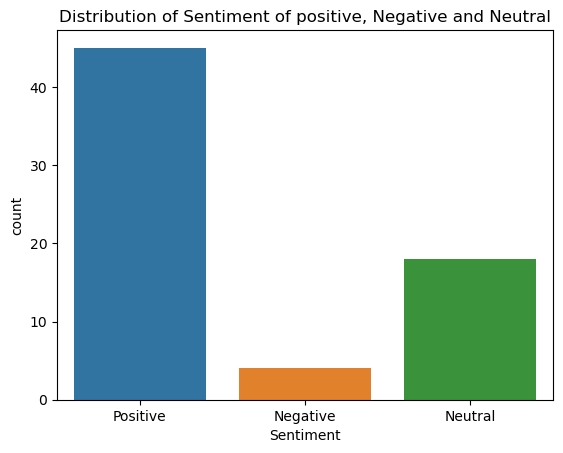

In [16]:
sns.countplot(sent1,x='Sentiment',hue='Sentiment')
plt.title("Distribution of Sentiment of positive, Negative and Neutral")

# 2) Which platform generates the most engagement in terms of likes and retweets?


In [17]:
data.head(1)

,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12


In [18]:
platforms=data[['Platform','Likes','Retweets']]
platforms.head()

,Platform,Likes,Retweets
0,Twitter,30.0,15.0
1,Twitter,10.0,5.0
2,Instagram,40.0,20.0
3,Facebook,15.0,8.0
4,Instagram,25.0,12.0


In [19]:
platforms['Platform'] = platforms['Platform'].str.strip()

C:\Users\karth\AppData\Local\Temp\ipykernel_25912\1177454097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  platforms['Platform'] = platforms['Platform'].str.strip()


In [20]:
platforms['Platform'].unique()

array(['Twitter', 'Instagram', 'Facebook'], dtype=object)

In [21]:
twitter = platforms[platforms['Platform'] == 'Twitter']

tw_likes= twitter['Likes'].mean()
print("Avg Twitter Likes:",tw_likes)
tw_re=twitter['Retweets'].mean()
print("Twitter Avg Retweets:",tw_re)


Avg Twitter Likes: 41.559670781893004
Twitter Avg Retweets: 20.86008230452675


In [22]:
insta=platforms[platforms['Platform'] == 'Instagram']
in_likes=insta['Likes'].mean()
print("Instagram Avg Likes:",in_likes)
in_re=insta['Retweets'].mean()
print("Instagram Avg Retweets:",in_re)


Instagram Avg Likes: 45.08914728682171
Instagram Avg Retweets: 22.600775193798448


In [23]:
face=platforms[platforms['Platform'] == 'Facebook']
fa_likes=face['Likes'].mean()
print("Facebook Avg Likes:",fa_likes)
fa_re=face['Retweets'].mean()
print("Facebook Avg Retweets:",fa_re)

Facebook Avg Likes: 41.87012987012987
Facebook Avg Retweets: 20.96969696969697


Text(0.5, 1.0, 'Most Likes in Platform')

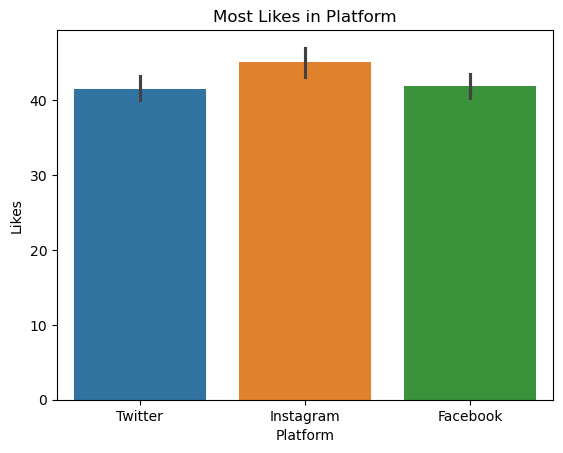

In [24]:
sns.barplot(data=platforms,x='Platform',y='Likes',hue='Platform')
plt.title("Most Likes in Platform")

Text(0.5, 1.0, 'Most Likes in Retweets')

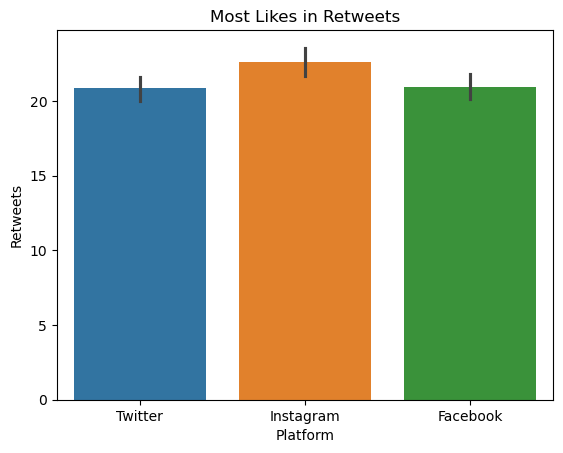

In [25]:
sns.barplot(data=platforms,x='Platform',y='Retweets',hue='Platform')
plt.title("Most Likes in Retweets")

### Instagram has most likes and retweets

# 3) Which users have the highest average engagement (likes and retweets per post)?


In [27]:
data.head(1)

,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12


In [28]:
user=data[['User','Likes','Retweets']]
user.head()

,User,Likes,Retweets
0,User123,30.0,15.0
1,CommuterX,10.0,5.0
2,FitnessFan,40.0,20.0
3,AdventureX,15.0,8.0
4,ChefCook,25.0,12.0


In [29]:
user.describe()

,Likes,Retweets
count,732.000000,732.000000
mean,42.901639,21.508197
std,14.089848,7.061286
min,10.000000,5.000000
25%,34.750000,17.750000
50%,43.000000,22.000000
75%,50.000000,25.000000
max,80.000000,40.000000


In [30]:
max_likes_user = user[user['Likes'] == user['Likes'].max()]

print("User(s) with Maximum Likes:")
print(max_likes_user)

User(s) with Maximum Likes:
                                      User  Likes  Retweets
336                     CultureEnthusiast    80.0      40.0
346                       FitnessJunkie      80.0      40.0
356                       Wanderlust         80.0      40.0
369                       Bookworm           80.0      40.0
383                       CosmosExplorer     80.0      40.0
403                       CosmosExplorer     80.0      40.0
433                       SolitaryDescent    80.0      40.0
471                        SunshineDancer    80.0      40.0
482                      ColorfulLaughter    80.0      40.0
511                      AdeleConcertGoer    80.0      40.0
521                 BieberDanceEnthusiast    80.0      40.0
531       MovieEnthusiastPremiereAttendee    80.0      40.0
541        FootballFanWorldCupCelebration    80.0      40.0
551                  SoccerFanTeamDefeats    80.0      40.0
561          NatureEnthusiastSunsetWonder    80.0      40.0
571   DanceE

In [31]:
top=max_likes_user.head()
top

,User,Likes,Retweets
336,CultureEnthusiast,80.0,40.0
346,FitnessJunkie,80.0,40.0
356,Wanderlust,80.0,40.0
369,Bookworm,80.0,40.0
383,CosmosExplorer,80.0,40.0


Text(0.5, 1.0, 'Most likes to user')

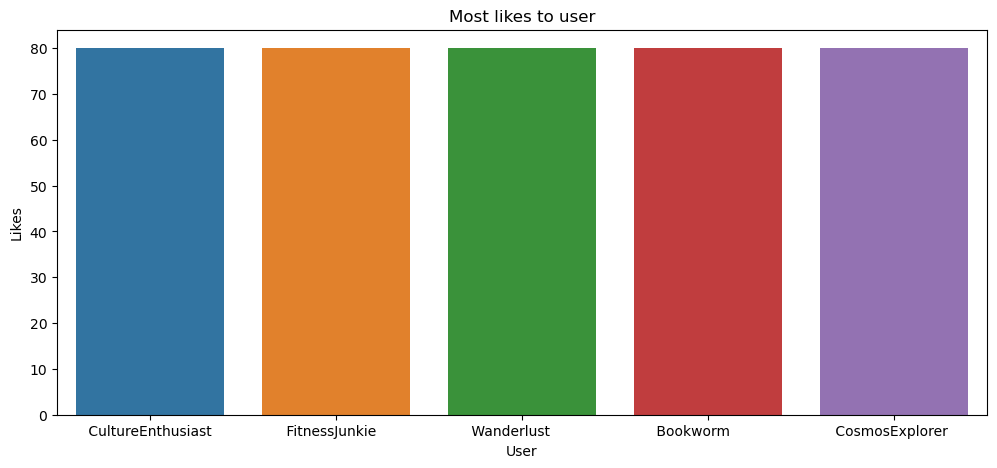

In [32]:
plt.figure(figsize=(12,5))
sns.barplot(data=top,x='User',y='Likes',hue='User')
plt.title("Most likes to user")

Text(0.5, 1.0, 'Most Retweets by user')

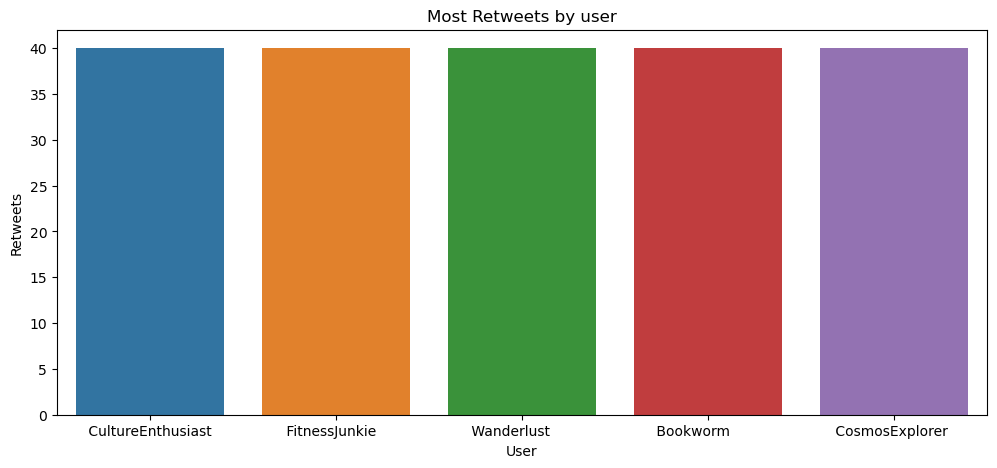

In [33]:
plt.figure(figsize=(12,5))
sns.barplot(data=top,x='User',y='Retweets',hue='User')
plt.title("Most Retweets by user")